## Cardiovascular Disease Dataset


### 1 Problem Statement
This project aims to analyze the influence of various factors on the presence of cardiovascular disease. These factors include demographic features like age and gender, physical attributes like height and weight, clinical measurements such as blood pressure and cholesterol levels, and lifestyle habits like alcohol consumption and physical activity.

### 2 Data Collection
The dataset used for this analysis is sourced from Kaggle and can be found at [CardioVascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data).

#### 2.1 Install required packages

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scipy
!pip install sklearn
!pip install pingouin
!pip install prince
!pip install plotly

^C



[notice] A new release of pip is available: 23.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 2.1 Import Data and Required Packages

Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import pingouin as pg
import prince

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

seed = 31 # defined to ensure that the random processes are reproducible

Import the CSV Data as Pandas DataFrame

In [2]:
def get_cardio_df():
    return pd.read_csv('data/cardio.csv', sep=";")

df = get_cardio_df()

Show Top 5 Records

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Shape of the dataset

In [4]:
df.shape

(70000, 13)

The dataset consists of 7000 rows and 13 columns.

#### 2.2 Dataset information

In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

There are 3 types of input features:

- **Objective**: factual information
- **Examination**: results of medical examination
- **Subjective**: information given by the patient

Features:

| Feature                               | Type                  | Code    | Data Type                        |
|---------------------------------------|-----------------------|---------|----------------------------------|
| Age                                   | Objective Feature     | age     | int (days)                       |
| Height                                | Objective Feature     | height  | int (cm)                         |
| Weight                                | Objective Feature     | weight  | float (kg)                       |
| Gender                                | Objective Feature     | gender  | categorical code                 |
| Systolic blood pressure               | Examination Feature   | ap_hi   | int                              |
| Diastolic blood pressure              | Examination Feature   | ap_lo   | int                              |
| Cholesterol                           | Examination Feature   | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                               | Examination Feature   | gluc    | 1: normal, 2: above normal, 3: well above normal |
| Smoking                               | Subjective Feature    | smoke   | binary                           |
| Alcohol intake                        | Subjective Feature    | alco    | binary                           |
| Physical activity                     | Subjective Feature    | active  | binary                           |
| Presence or absence of cardiovascular disease | Target Variable      | cardio  | binary                           |

### 3. Data Checks to Perform

- Verify data types
- Identify missing values
- Identify duplicates
- Review dataset statistics
- Examine categories across categorical columns

#### 3.1 Verify data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
def get_numerical_features(dataframe):
    return dataframe.select_dtypes(exclude='object').columns.tolist()

def get_categorical_features(dataframe):
    return dataframe.select_dtypes(include='object').columns.tolist()

numeric_features = get_numerical_features(df)
categorical_features = get_categorical_features(df)

print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 13 numerical features: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

We have 0 categorical features: []


As we can see, many of the data points are being treated as numeric when they are actually categorical. For instance, cholesterol levels are categorized into three specific values: 1 for 'normal', 2 for 'above normal', and 3 for 'well above normal'.

#### 3.2 Identify missing values

In [9]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no missing values in the dataset.

#### 3.3 Identify Duplicates

In [10]:
print("duplicates: ", df.duplicated().sum())

duplicates:  0


There are no duplicates in the dataset.

#### 3.4 Review dataset statistics

In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### Insights
- The dataset has an average age of approximately 53 years, with values ranging from 30 to 65 years.
- The average height is about 164 cm, with some extreme values of 55 cm and 250 cm, which appear to be outliers.
- The average weight is around 74 kg, also showing significant outliers, such as 10 kg and 200 kg. 
- The average systolic blood pressure is 129 mmHg, but there is high variability, with absurd values like -150 mmHg and 16020 mmHg.
- The average diastolic blood pressure is 97 mmHg, also with a high standard deviation and unrealistic values like -70 mmHg and 11000 mmHg. 

The outliers indicate the need for data review and cleaning.

#### 3.4 Data cleaning

We will start by dropping the id column

In [12]:
def drop_id_column(input_df):
    df_without_id = input_df.copy()
    df_without_id = df_without_id.drop(columns=['id'])
    return df_without_id

df_without_id = drop_id_column(df)
df_without_id.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Let's first map the numerical values of each variable to their corresponding categories.

In [13]:
def map_features_categories(input_df):
    df_with_categories = input_df.copy()
    df_with_categories['gender'] = df_with_categories['gender'].map({1: 'female', 2: 'male'})

    level_dict = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
    df_with_categories['cholesterol'] = df_with_categories['cholesterol'].map(level_dict)
    df_with_categories['gluc'] = df_with_categories['gluc'].map(level_dict)

    binary_map = {0: 'No', 1: 'Yes'}
    df_with_categories['smoke'] = df_with_categories['smoke'].map(binary_map)
    df_with_categories['alco'] = df_with_categories['alco'].map(binary_map)
    df_with_categories['active'] = df_with_categories['active'].map(binary_map)
    df_with_categories['cardio'] = df_with_categories['cardio'].map(binary_map)

    return df_with_categories

df_with_categories = map_features_categories(df_without_id)
df_with_categories.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,male,168,62.0,110,80,normal,normal,No,No,Yes,No
1,20228,female,156,85.0,140,90,well above normal,normal,No,No,Yes,Yes
2,18857,female,165,64.0,130,70,well above normal,normal,No,No,No,Yes
3,17623,male,169,82.0,150,100,normal,normal,No,No,Yes,Yes
4,17474,female,156,56.0,100,60,normal,normal,No,No,No,No


In [14]:
def convert_age_to_years(input_df):
    df_age_formatted = input_df.copy()
    df_age_formatted['age'] = df_age_formatted['age'] / 365
    return df_age_formatted

df_age_formatted = convert_age_to_years(df_with_categories)
df_age_formatted.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,male,168,62.0,110,80,normal,normal,No,No,Yes,No
1,55.419178,female,156,85.0,140,90,well above normal,normal,No,No,Yes,Yes
2,51.663014,female,165,64.0,130,70,well above normal,normal,No,No,No,Yes
3,48.282192,male,169,82.0,150,100,normal,normal,No,No,Yes,Yes
4,47.873973,female,156,56.0,100,60,normal,normal,No,No,No,No


According to the guidelines from [American College of Cardiology/American Heart Association (2017)](https://en.wikipedia.org/wiki/Blood_pressure)

- **Normal:** systolic (<120) and diastolic (<80)
- **Elevated:** systolic (120–129) or diastolic (80–89)
- **Hypertension, stage 1:** systolic (130–139) or diastolic (80–89)
- **Hypertension, stage 2:** systolic (≥140) or diastolic (≥90)

Also, according to [this reference](https://linkinghub.elsevier.com/retrieve/pii/S1933171116303886):

- **Hypotension:** systolic (<110) and diastolic (<70)

So we will define a variable `blood_pressure_category` where the categories are defined based on the values of two variables: `ap_hi` (systolic blood pressure) and `ap_lo` (diastolic blood pressure), and the above information.

In [15]:
def categorize_blood_pressure_row(row):
    if row['ap_hi'] < 110 and row['ap_lo'] < 70:
        return 'Hypotension'
    elif row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'Normal'
    elif row['ap_hi'] < 130 and row['ap_lo'] < 80:
        return 'Elevated'
    elif row['ap_hi'] < 140  or row['ap_lo'] < 90:
        return 'Hypertension, stage 1'
    elif row['ap_hi'] >= 140 or row['ap_lo'] >= 90:
        return 'Hypertension, stage 2'
    else:
        return 'Undefined'
    
def categorize_blood_pressure(input_df):
    df_with_blood_pressure_category = input_df.copy()
    df_with_blood_pressure_category['blood_pressure_category'] = df_with_blood_pressure_category.apply(categorize_blood_pressure_row, axis=1)

    df_with_blood_pressure_category = df_with_blood_pressure_category.drop(columns=["ap_lo", "ap_hi"])

    return df_with_blood_pressure_category

df_with_blood_pressure_category = categorize_blood_pressure(df_age_formatted)
print("Undefined count: ", len(df_with_blood_pressure_category[df_with_blood_pressure_category['blood_pressure_category'] == "Undefined"]))
df_with_blood_pressure_category.head()

Undefined count:  0


,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure_category
0,50.391781,male,168,62.0,normal,normal,No,No,Yes,No,"Hypertension, stage 1"
1,55.419178,female,156,85.0,well above normal,normal,No,No,Yes,Yes,"Hypertension, stage 2"
2,51.663014,female,165,64.0,well above normal,normal,No,No,No,Yes,"Hypertension, stage 1"
3,48.282192,male,169,82.0,normal,normal,No,No,Yes,Yes,"Hypertension, stage 2"
4,47.873973,female,156,56.0,normal,normal,No,No,No,No,Hypotension


By doing this, we addressed the outlier values found in the ap_hi and ap_lo columns by categorizing them under the blood_pressure_category variable. Now, let's review the data statistics:

In [16]:
df_with_blood_pressure_category.describe()

,age,height,weight
count,70000.000000,70000.000000,70000.000000
mean,53.339358,164.359229,74.205690
std,6.759594,8.210126,14.395757
min,29.583562,55.000000,10.000000
25%,48.394521,159.000000,65.000000
50%,53.980822,165.000000,72.000000
75%,58.430137,170.000000,82.000000
max,64.967123,250.000000,200.000000


As we can see, the lower bound for the height feature is 55 centimeters and for the weight feature is 10 kilograms. These values seem unrealistic, given that the age range in the dataset is from 29 to 64 years, indicating that the dataset does not include children.

For this reason, we will set a lower limit for these features (120 centimeters and 35 kilograms) and drop the rows that do not meet these criteria.

In [17]:
def remove_height_and_weight_lower_outliers(input_df):
    df_with_outliers_removed = input_df.copy()
    df_with_outliers_removed = df_with_outliers_removed[df_with_outliers_removed['height'] > 120]
    df_with_outliers_removed = df_with_outliers_removed[df_with_outliers_removed['weight'] > 35]
    return df_with_outliers_removed

df_with_outliers_removed = remove_height_and_weight_lower_outliers(df_with_blood_pressure_category)
n_rows_dropped = len(df_with_blood_pressure_category) - len(df_with_outliers_removed)
percentage_rows_dropped = n_rows_dropped * 100 / len(df_with_blood_pressure_category) 
print("Rows dropped: ", n_rows_dropped)
print("Rows dropped: {:.4f}%".format(percentage_rows_dropped))

Rows dropped:  107
Rows dropped: 0.1529%


To finish the data cleaning proccess, we will group all the cleaning and formatation in the below function, and save the formatted df in a variable called df_formatted.

In [18]:
def get_formatted_df():
    df0 = get_cardio_df()
    df1 = drop_id_column(df0)
    df2 = map_features_categories(df1)
    df3 = convert_age_to_years(df2)
    df4 = categorize_blood_pressure(df3)
    df5 = remove_height_and_weight_lower_outliers(df4)
    return df5

df_formatted = get_formatted_df()

Let's explore the correlation between the numerical features in the dataset.

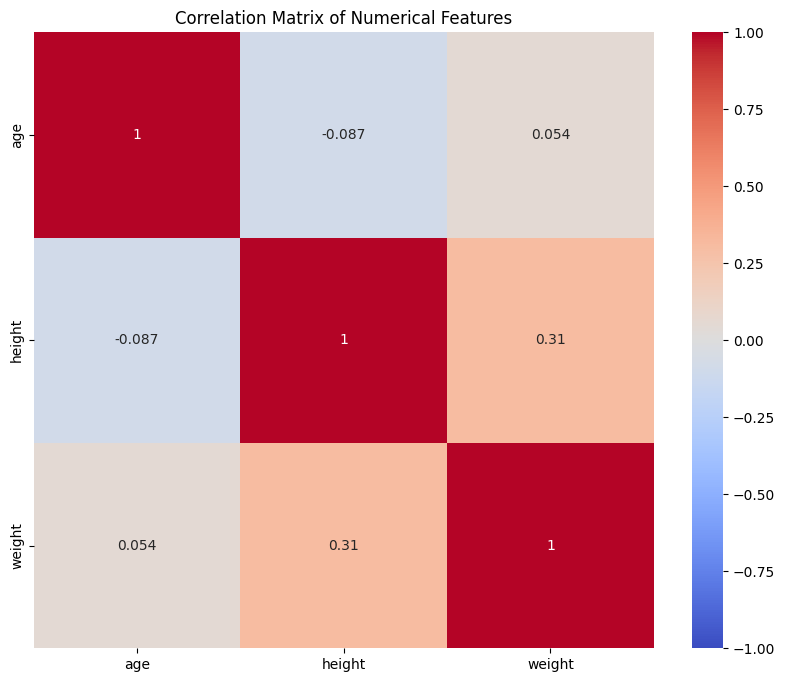

In [19]:
numerical_features = df_formatted.select_dtypes(include='number')
corr_matrix = numerical_features.corr().round(3)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We observe a significant but small positive correlation (0.31) between height and weight. 

Now, let's examine how they correlates with the cardio feature, treated as a numeric value (0 or 1):

In [20]:
df_with_cardio_numeric = df_formatted.copy()

df_with_cardio_numeric['cardio_numeric'] = df_with_cardio_numeric['cardio'].apply(lambda x: 1 if x == 'Yes' else 0)
cardio_corr = df_with_cardio_numeric[numerical_features.columns].corrwith(df_with_cardio_numeric['cardio_numeric'])

cardio_corr

age       0.238185
height   -0.012538
weight    0.182224
dtype: float64

The correlation results show that age (0.238) and weight (0.182) have a positive correlation with the cardio feature, while height (-0.013) has a negligible negative correlation.

#### 3.5 Examine categories across categorical columns

In [21]:
unique_counts = {col: df_formatted[col].nunique() for col in df_formatted.columns[df_formatted.dtypes == 'object']}
for col, uniques in unique_counts.items():
    print(f'{col}: {df_formatted[col].unique()}')

gender: ['male' 'female']
cholesterol: ['normal' 'well above normal' 'above normal']
gluc: ['normal' 'above normal' 'well above normal']
smoke: ['No' 'Yes']
alco: ['No' 'Yes']
active: ['Yes' 'No']
cardio: ['No' 'Yes']
blood_pressure_category: ['Hypertension, stage 1' 'Hypertension, stage 2' 'Hypotension' 'Normal'
 'Elevated']


### 4. Exploring Data

#### 4.1 Univariate Analysis

First, let's examine the frequency of each category

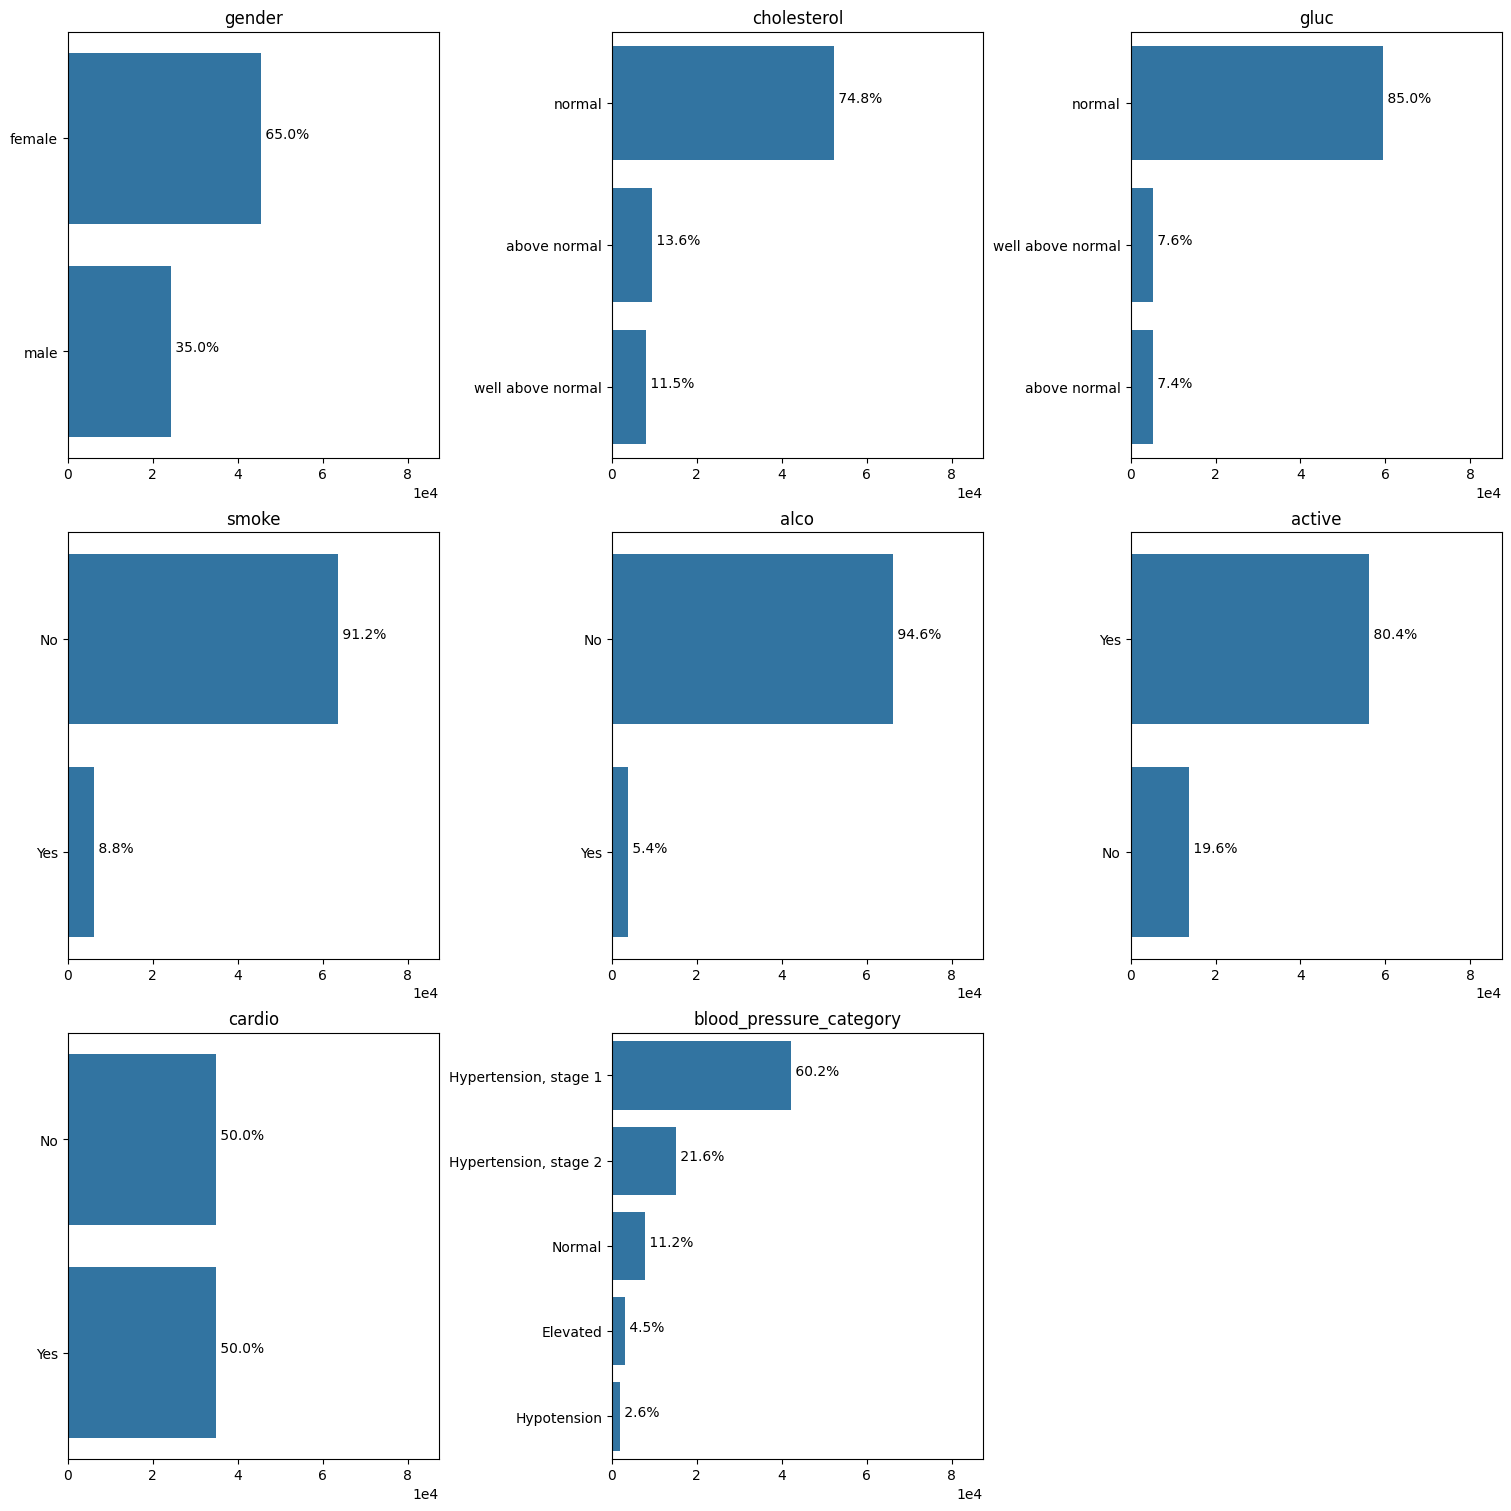

In [22]:
cat_attributes = df_formatted.select_dtypes(include='object')
columns = cat_attributes.columns.tolist()

num_columns_in_grid = 3
num_rows = (len(columns) + num_columns_in_grid - 1) // num_columns_in_grid

fig, axes = plt.subplots(num_rows, num_columns_in_grid, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    
    sorted_data = cat_attributes[column].value_counts().sort_values(ascending=False)
    sns.barplot(y=sorted_data.index, x=sorted_data.values, ax=ax, orient='h')
    
    total = cat_attributes[column].size
    for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.01
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
    
    ax.set_xlim(0, total * 1.25) 
    ax.set_title(column) 
    ax.set_ylabel("") 
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) 

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.ylabel("")
plt.show()

##### Insights

- 65% of the data is from female participants.
- Over 75% of the data shows normal cholesterol and glucose levels.
- The majority of individuals do not smoke (91.2%) and do not drink alcohol (94.6%).
- Approximately 80% of the individuals engage in physical activity.
- The dataset is balanced in terms of cardiovascular disease occurrence (50%).
- Approximately 60% of the observations are from people with Hypertension, stage 1. Only 11.2% of the people in the dataset have normal blood pressure.

Now, let's examine the boxplot for the numerical features:

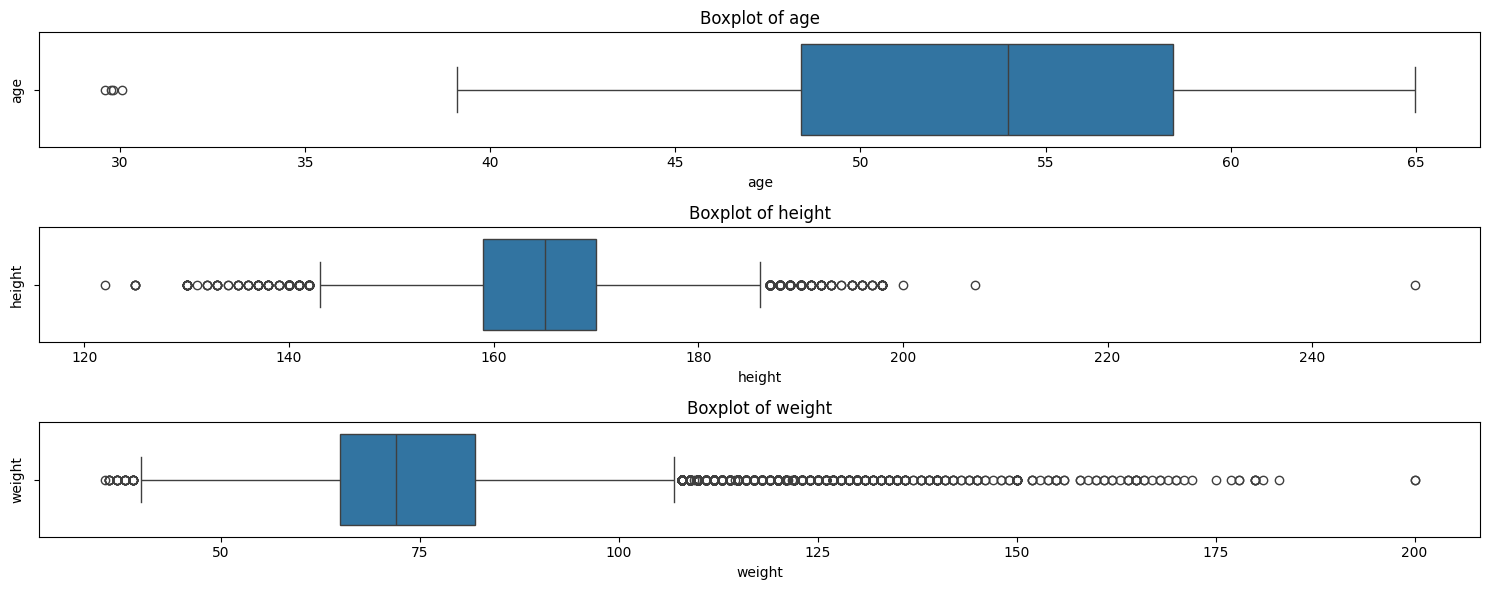

In [23]:
num_features = get_numerical_features(df_formatted)

num_cols = 1
num_rows = (len(num_features) + num_cols - 1) // num_cols

plt.figure(figsize=(15, 2 * num_rows))

for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.boxplot(x=feature, data=df_formatted)
    ax.set_ylabel(feature)
    ax.set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

#### Insights

- The age variable shows outliers representing younger individuals, around 30 years old, with an interquartile range spanning from just under 50 to nearly 60.
- The height variable exhibits outliers at both ends of the spectrum, with one notably high observation above 240 centimeters.
- The weight variable has numerous upper outliers, ranging from individuals weighing over 100 kilograms to as much as 175 kilograms, with one extreme observation nearing 200 kilograms.

#### 4.2 Multivariate Analysis

Initially, we'll visualize the percentage distribution of cardiovascular disease across categorical variables.

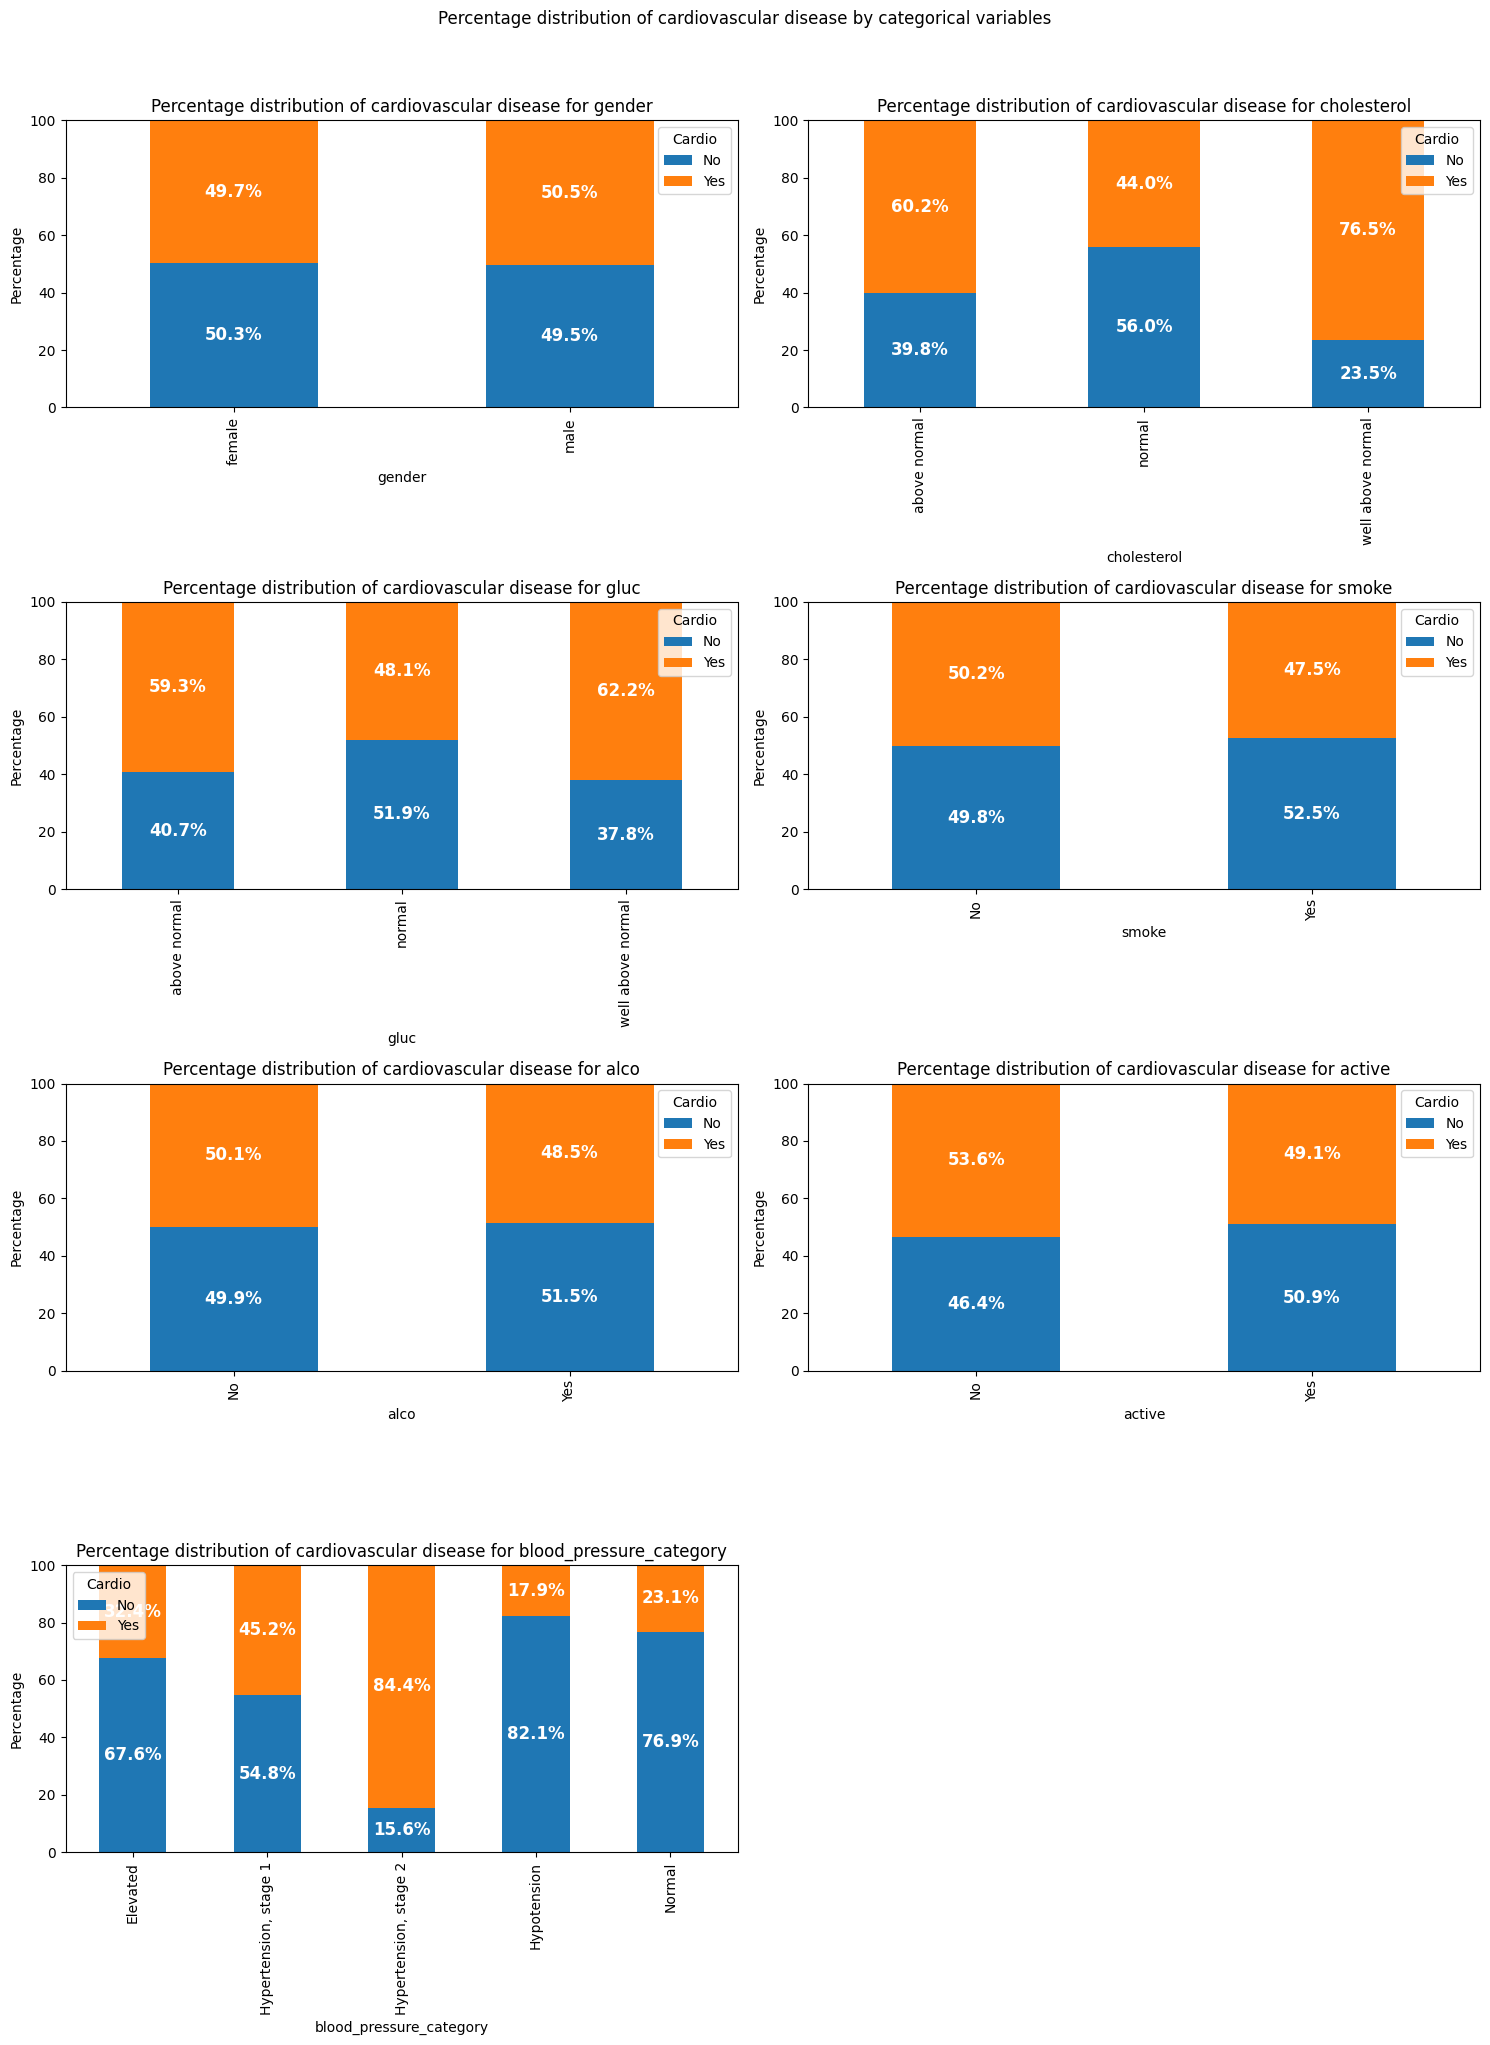

In [24]:
cat_attributes = df_formatted.select_dtypes(include='object').columns
cat_attributes = cat_attributes.drop("cardio")

num_plots = len(cat_attributes)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
fig.suptitle('Percentage distribution of cardiovascular disease by categorical variables', y=1.02)

axes = axes.flatten()

for i, var in enumerate(cat_attributes):
    cross_tab = pd.crosstab(df_formatted[var], df_formatted['cardio'])
    
    total_per_category = cross_tab.sum(axis=1)
    cross_tab_percent = cross_tab.div(total_per_category, axis=0) * 100
    
    cross_tab_percent.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Percentage distribution of cardiovascular disease for {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Cardio', labels=['No', 'Yes'])
    axes[i].set_ylim(0, 100) 
    
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                         ha='center', va='center', fontsize=12, color='white', weight='bold')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Insights

- Cardiovascular disease prevalence is evenly distributed between genders.
- There is a notable increase in cardiovascular disease prevalence with higher cholesterol levels: from 44% for normal to 60% for above normal, and further to 76.5% for well above normal.
- Cardiovascular disease prevalence remains lower for individuals with normal glucose levels, with minimal increase observed from above normal to well above normal.
- Interestingly, individuals who do not consume alcohol or smoke show slightly higher cardiovascular disease prevalence, but the difference is less than 3%.
- Engaging in physical activity appears to reduce cardiovascular disease risk, with a 4.5% lower prevalence observed among active individuals.
- Cardiovascular disease prevalence increases significantly with blood pressure levels: 17.9% for normal and 23.1% for hypotension, rising to 32.4% for elevated, 45.2% for hypertension stage 1, and peaking at 84.4% for hypertension stage 2.

Next, we will create boxplots to visualize the distribution of age, weight, and height across the categories of cardiovascular disease presence (yes and no)

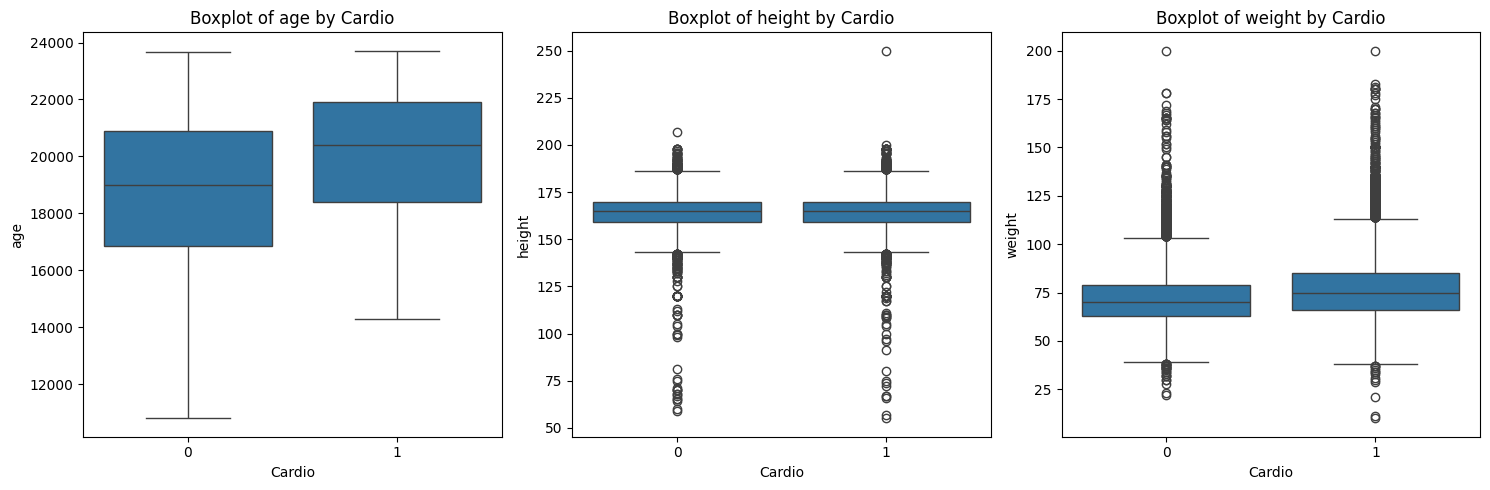

In [25]:
num_features = get_numerical_features(df_formatted)

num_cols = 3
num_rows = (len(num_features) + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.boxplot(x='cardio', y=feature, data=df)
    
    for j, box in enumerate(ax.artists):
        median_val = df[df['cardio'] == ax.get_xticklabels()[j].get_text()][feature].median()
        ax.text(j, median_val + 1, f'{median_val}', horizontalalignment='center', color='black', weight='bold')

    ax.set_xlabel('Cardio')
    ax.set_ylabel(feature)
    ax.set_title(f'Boxplot of {feature} by Cardio')

plt.tight_layout()
plt.show()

#### Insights

- Individuals with cardiovascular disease tend to have higher age and weight.
- There appears to be little variation in height among individuals with cardiovascular problems.

### 4.3 Statistical Tests

We will conduct statistical tests to explore the relationship between the presence of cardiovascular disease and other variables in the dataset.


#### 4.3.1 Mean of numerical features
Let's visualize the overall mean values of the numerical variables in the dataset, as well as the means categorized by the presence and absence of cardiovascular disease.

In [26]:
summary = df_formatted.groupby('cardio').agg({
    'age': ['mean', 'var'],
    'weight': ['mean', 'var'],
    'height': ['mean', 'var']
}).reset_index()

summary.columns = ['cardio', 'age_mean', 'age_var', 'weight_mean', 'weight_var', 'height_mean', 'height_var']

means_summary = summary[['cardio', 'age_mean', 'weight_mean', 'height_mean']]

overall_means = df_formatted[['age', 'weight', 'height']].mean().to_frame().T
overall_means['cardio'] = 'overall mean'
overall_means.columns = ['age_mean', 'weight_mean', 'height_mean', 'cardio']

means_summary = pd.concat([means_summary, overall_means], ignore_index=True)

print("Means Summary:")
print(means_summary)

Means Summary:
         cardio   age_mean  weight_mean  height_mean
0            No  51.731105    71.597589   164.538182
1           Yes  54.950793    76.827324   164.340834
2  overall mean  53.340143    74.211147   164.439558


Additionally, let's visualize the variance of these numerical variables across the dataset, and specifically compare the variance between cases with and without cardiovascular disease.

In [27]:
summary = df_formatted.groupby('cardio').agg({
    'age': ['mean', 'var'],
    'weight': ['mean', 'var'],
    'height': ['mean', 'var']
}).reset_index()

summary.columns = ['cardio', 'age_mean', 'age_var', 'weight_mean', 'weight_var', 'height_mean', 'height_var']

variances_summary = summary[['cardio', 'age_var', 'weight_var', 'height_var']]

overall_vars = df_formatted[['age', 'weight', 'height']].var().to_frame().T
overall_vars['cardio'] = 'overall var'
overall_vars.columns = ['age_var', 'weight_var', 'height_var', 'cardio']

variances_summary = pd.concat([variances_summary, overall_vars], ignore_index=True)

print("Variances Summary:")
print(variances_summary)

Variances Summary:
        cardio    age_var  weight_var  height_var
0           No  45.918971  175.889874   60.166634
1          Yes  40.260433  222.301646   63.693981
2  overall var  45.682137  205.918919   61.938275


Now, let's perform a t-test to verify if the mean of the variable in the two different groups, cardio (yes) and cardio (no). For that, we need to determine if the variance is statistically different between groups, so we will use an F-test.

The null hypotheses are:
- H0: The variance of height for cardio (yes) is equal to the variance of height for cardio (no).
- H0: The variance of weight for cardio (yes) is equal to the variance of weight for cardio (no).
- H0: The variance of age for cardio (yes) is equal to the variance of age for cardio (no).

In [28]:
group_0 = df_formatted[df_formatted['cardio'] == 'No']
group_1 = df_formatted[df_formatted['cardio'] == 'Yes']

F_age, p_value_age = f_oneway(group_0['age'], group_1['age'])
F_weight, p_value_weight = f_oneway(group_0['weight'], group_1['weight'])
F_height, p_value_height = f_oneway(group_0['height'], group_1['height'])

print(f'Age F-test p-value: {p_value_age:.5f}')
print(f'Weight F-test p-value: {p_value_weight:.5f}')
print(f'Height F-test p-value: {p_value_height:.5f}')

Age F-test p-value: 0.00000
Weight F-test p-value: 0.00000
Height F-test p-value: 0.00092


The p-values for all tests are below 0.05, indicating that we reject the null hypothesis. Therefore, we can proceed with a Student's t-test, assuming unequal variances.

In [29]:
age_ttest = ttest_ind(group_0['age'], group_1['age'], equal_var=False)
weight_ttest = ttest_ind(group_0['weight'], group_1['weight'], equal_var=False)
height_ttest = ttest_ind(group_0['height'], group_1['height'], equal_var=False)

print(f'Age t-test p-value: {age_ttest.pvalue:.5f}')
print(f'Weight t-test p-value: {weight_ttest.pvalue:.5f}')
print(f'Height t-test p-value: {height_ttest.pvalue:.5f}')

Age t-test p-value: 0.00000
Weight t-test p-value: 0.00000
Height t-test p-value: 0.00092


Once more, with p-values consistently below 0.05, we conclude that there are significant differences in the means of age, weight, and height between individuals with and without cardiovascular disease. This suggests a notable correlation among these variables and the presence of the disease.

#### 4.3.2 Categories association

We will perform a chi-squared test to determine if there is a significant association between the categorical variables and the cardio variable.

The null hypothesis (H₀) is that there is no association between the categorical variables and the cardio variable. In other words, any observed relationship is due to chance.

In [31]:
categorical_columns = get_categorical_features(df_formatted)

for col in categorical_columns:
    tabela_mca = chi2_contingency(pd.crosstab(df_formatted[col], df_formatted['cardio']))
    p_valor = tabela_mca[1]
    print(f"Variable {col}")
    print(f"p-value of chi-squared statistic: {p_valor:.4f}\n")

Variable gender
p-value of chi-squared statistic: 0.0340

Variable cholesterol
p-value of chi-squared statistic: 0.0000

Variable gluc
p-value of chi-squared statistic: 0.0000

Variable smoke
p-value of chi-squared statistic: 0.0000

Variable alco
p-value of chi-squared statistic: 0.0625

Variable active
p-value of chi-squared statistic: 0.0000

Variable cardio
p-value of chi-squared statistic: 0.0000

Variable blood_pressure_category
p-value of chi-squared statistic: 0.0000



The variables gender (p = 0.0340), cholesterol, gluc, smoke, active, cardio, and blood_pressure_category (all p = 0.0000) show significant associations with the cardio variable. Only the variable alco (p = 0.0625) does not show a significant association at the 0.05 significance level.

### 4.4 Clustering

We will employ clustering techniques to group the numerical variables in the dataset into clusters. Subsequently, we will examine the relationship between these clusters and the presence of disease.


In [32]:
num_features = get_numerical_features(df_formatted)
df_num = df[num_features]
df_num.head()

,age,height,weight
0,18393,168,62.0
1,20228,156,85.0
2,18857,165,64.0
3,17623,169,82.0
4,17474,156,56.0


In [33]:
df_num_zscore = df_num.apply(zscore, ddof=1)
df_num_zscore.head()

,age,height,weight
0,-0.436058,0.443449,-0.847867
1,0.307684,-1.018161,0.749826
2,-0.247995,0.078046,-0.708937
3,-0.748147,0.565250,0.541431
4,-0.808538,-1.018161,-1.264657


We will use the K-means clustering technique. Initially, we will apply the elbow method followed by the silhouette method to determine the optimal number of clusters.

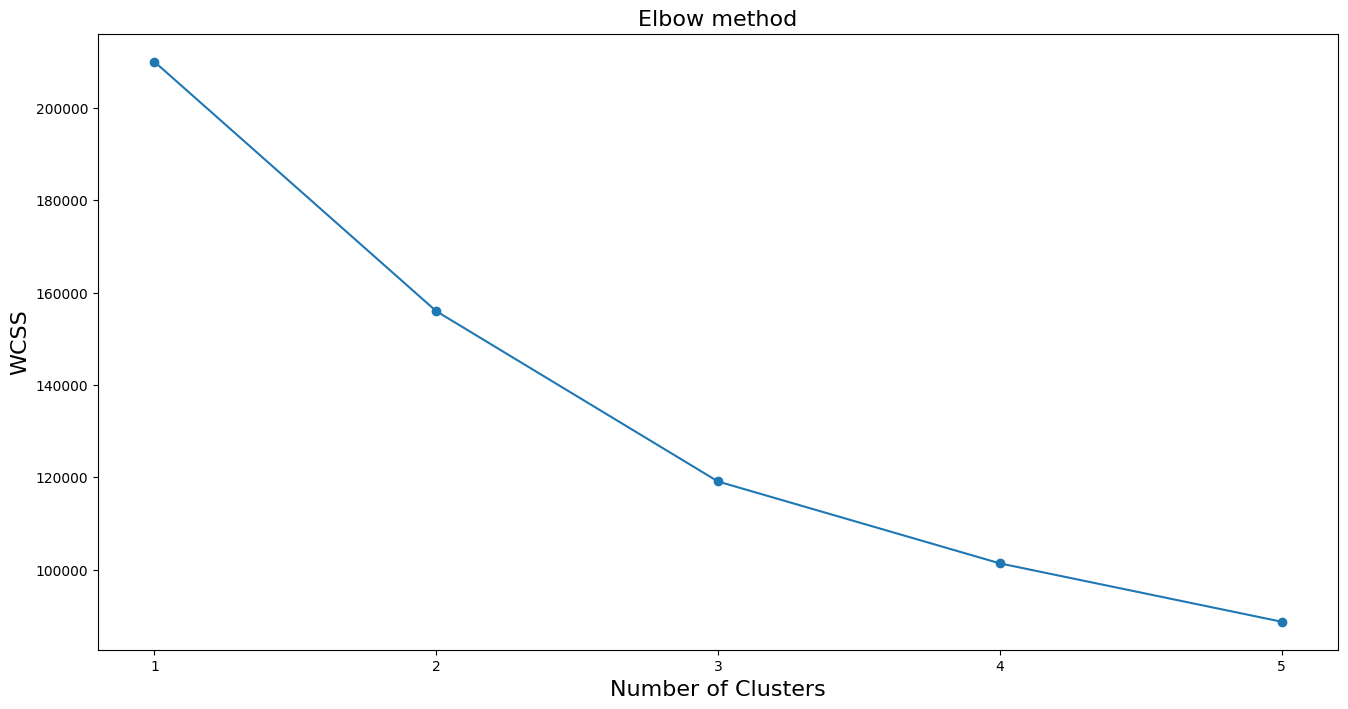

In [34]:
elbow = []
K = range(1,6)
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=seed).fit(df_num_zscore)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xticks(range(1,6))
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.title('Elbow method', fontsize=16)
plt.show()

After applying the elbow method, the graph indicates that 3 clusters may be optimal.

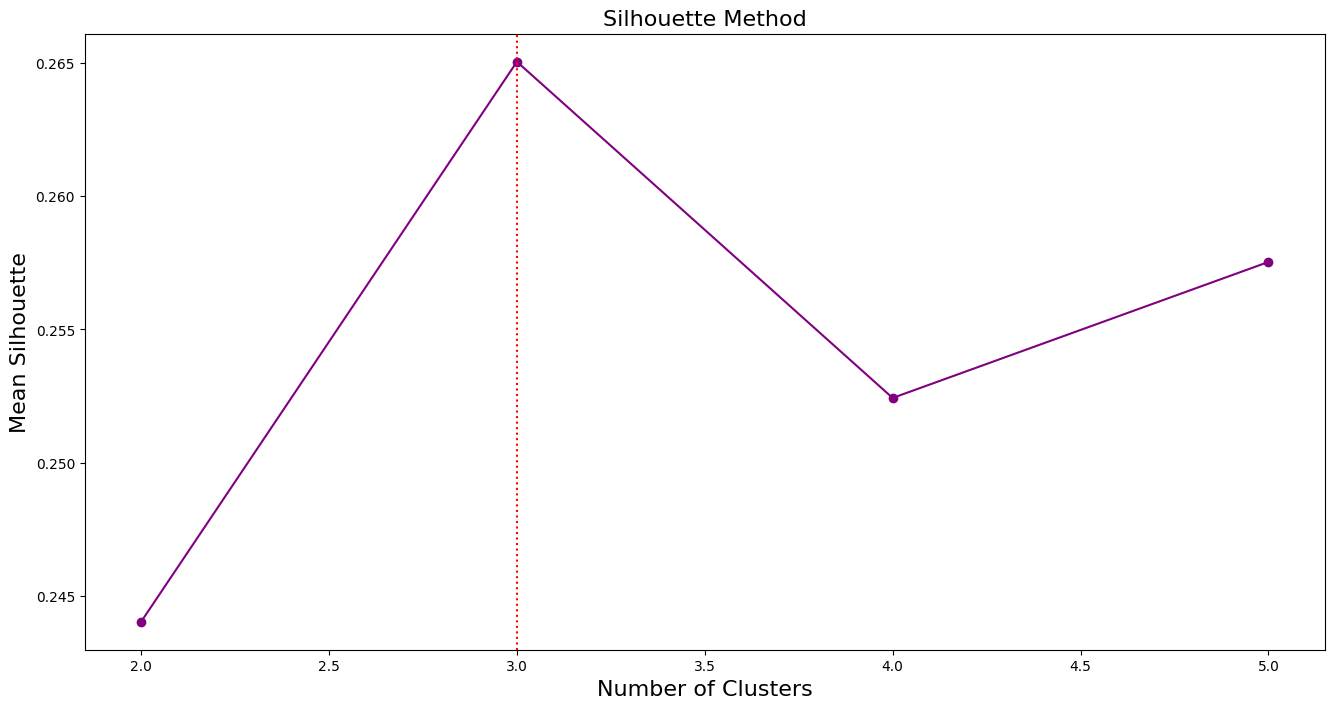

In [35]:
silhueta = []
I = range(2,6)
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=seed).fit(df_num_zscore)
    silhueta.append(silhouette_score(df_num_zscore, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 6), silhueta, color = 'purple', marker='o')
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('Mean Silhouette', fontsize=16)
plt.title('Silhouette Method', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

The silhouette method confirms the suitability of using 3 clusters. 

Below, a function is constructed to cluster the numerical features into 3 groups using K-means.

In [ ]:
def get_formatted_df_with_clusters():
    df_formatted_with_cluster = get_formatted_df()

    num_features = get_numerical_features(df_formatted_with_cluster)
    df_num = df_formatted_with_cluster[num_features]
    df_num_zscore = df_num.apply(zscore, ddof=1)
    
    kmeans_final = KMeans(n_clusters = 3, init = 'random', random_state=seed).fit(df_num_zscore)

    kmeans_clusters = kmeans_final.labels_
    df_formatted_with_cluster['Cluster'] = kmeans_clusters
    df_formatted_with_cluster['Cluster'] = df_formatted_with_cluster['Cluster'].astype('object')

    return df_formatted_with_cluster

df_formatted_with_cluster = get_formatted_df_with_clusters()
df_formatted_with_cluster.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure_category,Cluster
0,50.391781,male,168,62.0,normal,normal,No,No,Yes,No,"Hypertension, stage 1",2
1,55.419178,female,156,85.0,well above normal,normal,No,No,Yes,Yes,"Hypertension, stage 2",1
2,51.663014,female,165,64.0,well above normal,normal,No,No,No,Yes,"Hypertension, stage 1",2
3,48.282192,male,169,82.0,normal,normal,No,No,Yes,Yes,"Hypertension, stage 2",0
4,47.873973,female,156,56.0,normal,normal,No,No,No,No,Hypotension,2


We will perform an ANOVA test to investigate whether there are statistically significant differences in the means of the variables across the clusters. This analysis aims to ascertain whether the variables have contributed meaningfully to the formation of these distinct clusters. Our null hypothesis states that there is no significant difference in means among the clusters, implying that any observed differences are due to random chance. The alternative hypothesis suggests that at least one variable's mean differs significantly across the clusters, indicating its influence in cluster formation.

In [ ]:
anova_age = pg.anova(dv='age', between='Cluster', data=df_formatted_with_cluster, detailed=True).T
anova_height = pg.anova(dv='height', between='Cluster', data=df_formatted_with_cluster, detailed=True).T
anova_weight = pg.anova(dv='weight', between='Cluster', data=df_formatted_with_cluster, detailed=True).T

try:
    p_value_age = anova_age.loc['p-unc', 'Cluster']
    p_value_height = anova_height.loc['p-unc', 'Cluster']
    p_value_weight = anova_weight.loc['p-unc', 'Cluster']
except KeyError as e:
    print(f"KeyError: {e}. Please check the DataFrame structure.")

print(f"P-value age: {p_value_age}")
print(f"P-value height: {p_value_height}")
print(f"P-value weight: {p_value_weight}")

KeyError: 'Cluster'. Please check the DataFrame structure.
P-value age: 0.0
P-value height: 0.0009172185569217185
P-value weight: 0.0


Based on the provided p-values:

- Age and weight both have p-values of 0.0, indicating significant differences across the clusters.
- Height has a p-value of approximately 0.00092, suggesting significant differences as well, albeit less pronounced than age and weight.

Therefore, we reject the null hypothesis for all variables, concluding that age, height, and weight have significantly influenced the formation of these clusters.

We will now analyze the mean values of the age, height, and weight variables within each cluster.

In [ ]:
df_num_2 = df_formatted_with_cluster[num_features]
df_num_2['Cluster'] = df_formatted_with_cluster['Cluster']
mean_values = df_num_2.groupby('Cluster').mean()[['age', 'height', 'weight']]

print("Mean values by cluster:\n", mean_values)

Mean values by cluster:
                age      height     weight
Cluster                                  
0        54.947256  171.003548  88.677164
1        57.911674  159.856895  68.166228
2        45.908995  164.342052  68.721292



Cluster 0 has older, taller, and heavier individuals. Cluster 1 has the oldest, shortest, and lightest individuals. Cluster 2 has the youngest individuals with intermediate height and low height.

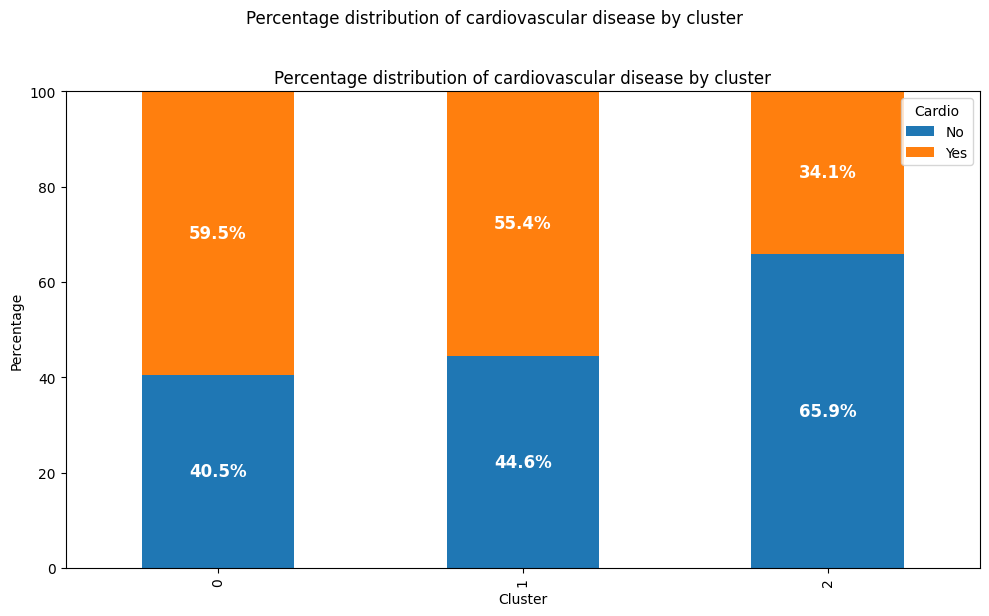

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Percentage distribution of cardiovascular disease by cluster', y=1.02)

cross_tab = pd.crosstab(df_formatted_with_cluster['Cluster'], df_formatted_with_cluster['cardio'])

total_per_category = cross_tab.sum(axis=1)
cross_tab_percent = cross_tab.div(total_per_category, axis=0) * 100

cross_tab_percent.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage distribution of cardiovascular disease by cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Percentage')
ax.legend(title='Cardio', labels=['No', 'Yes'])
ax.set_ylim(0, 100)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

Cluster 0 has the highest proportion of individuals with cardiovascular disease, at around 60%, followed by Cluster 1 at approximately 55%. In contrast, Cluster 2 has only 34.1% of individuals with the disease.

This makes sense, as Clusters 0 and 1 consist of older individuals compared to Cluster 2, and Cluster 0 has heavier individuals.

To finish the cluster analysis, let's conduct a chi-squared test to determine the association between the newly created variable and the presence of cardiovascular disease.

In [ ]:
tabela_mca = chi2_contingency(pd.crosstab(df_formatted_with_cluster['Cluster'], df_formatted_with_cluster['cardio']))
p_valor = tabela_mca[1]
print(f"p-value of chi-squared statistic: {p_valor:.4f}\n")

p-value of chi-squared statistic: 0.0000



With a p-value of 0, we reject the null hypothesis and confirm a significant association.

### Correlation Analysis and Perceptual Map

This section focuses on analyzing correlations and constructing a perceptual map based on the data.


To construct the perceptual map, each variable must exhibit significant correlation with at least one other variable. Initially, we will reassess the p-values from the chi-squared statistic for each column in relation to the cardio column.

In [ ]:
for col in categorical_columns:
    tabela_mca = chi2_contingency(pd.crosstab(df_formatted_with_cluster[col], df_formatted_with_cluster['cardio']))
    p_valor = tabela_mca[1]
    print(f"Variable: {col}")
    print(f"p-valor of chi-squared statistic: {p_valor:.4f}\n")

Variable: gender
p-valor of chi-squared statistic: 0.0340

Variable: cholesterol
p-valor of chi-squared statistic: 0.0000

Variable: gluc
p-valor of chi-squared statistic: 0.0000

Variable: smoke
p-valor of chi-squared statistic: 0.0000

Variable: alco
p-valor of chi-squared statistic: 0.0625

Variable: active
p-valor of chi-squared statistic: 0.0000

Variable: cardio
p-valor of chi-squared statistic: 0.0000

Variable: blood_pressure_category
p-valor of chi-squared statistic: 0.0000




The only variable with a significant p-value below 0.05 is alcohol intake (alco). To proceed, we need to determine if it correlates with any other variable by conducting another chi-squared test.

In [ ]:
for col in categorical_columns:
    tabela_mca = chi2_contingency(pd.crosstab(df_formatted_with_cluster[col], df_formatted_with_cluster['alco']))
    p_valor = tabela_mca[1]
    print(f"Variable: {col}")
    print(f"p-valor of chi-squared statistic: {p_valor:.4f}\n")

Variable: gender
p-valor of chi-squared statistic: 0.0000

Variable: cholesterol
p-valor of chi-squared statistic: 0.0000

Variable: gluc
p-valor of chi-squared statistic: 0.0000

Variable: smoke
p-valor of chi-squared statistic: 0.0000

Variable: alco
p-valor of chi-squared statistic: 0.0000

Variable: active
p-valor of chi-squared statistic: 0.0000

Variable: cardio
p-valor of chi-squared statistic: 0.0625

Variable: blood_pressure_category
p-valor of chi-squared statistic: 0.0000




Indeed, it shows significant correlations with several variables, as evidenced by p-values less than 0.05. 

Lets conduct a multiple correspondence analysis on the qualitative features of the dataset.

In [ ]:
categorical_columns = get_categorical_features(df_formatted_with_cluster)
df_formatted_categorical = df_formatted_with_cluster[categorical_columns].copy()

mca = prince.MCA(n_components=10).fit(df_formatted_categorical)

eigenvalues_table = mca.eigenvalues_summary
print(eigenvalues_table)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.207        12.40%                     12.40%
1              0.189        11.36%                     23.76%
2              0.150         8.99%                     32.75%
3              0.131         7.88%                     40.63%
4              0.114         6.86%                     47.49%
5              0.112         6.71%                     54.19%
6              0.111         6.67%                     60.86%
7              0.111         6.64%                     67.50%
8              0.108         6.49%                     74.00%
9              0.091         5.47%                     79.47%


The variance is distributed among the components of MCA. For the dimensions that we can visualize graphically (2 and 3), we capture only 23.76% and 32.75% of the variance, respectively. Nonetheless, we will conclude this phase by creating perceptual maps with two components to gain some insights.

In [ ]:
mca = prince.MCA(n_components=2).fit(df_formatted_categorical)
standard_coord = mca.column_coordinates(df_formatted_categorical) / np.sqrt(mca.eigenvalues_)
coord_obs = mca.row_coordinates(df_formatted_categorical)
coord_obs.rename(columns={0: 'dim1_acm', 1: 'dim2_acm'}, inplace=True)

chart = standard_coord.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

name_categ=[]
for col in df_formatted_categorical:
    name_categ.append(df_formatted_categorical[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(name_categ).stack().reset_index()

chart_df_mca = pd.DataFrame({'category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variable': var_chart,
                             'category_id': categories[0]})
fig = px.scatter(chart_df_mca, 
                    x='obs_x', 
                    y='obs_y', 
                    color='variable',
                    text=chart_df_mca.category_id) 

fig.update_traces(textposition='top right', textfont_size=8)

fig.update_layout(title='Plot of line coordinates in MCA',
                  xaxis_title='Dimension 1',
                  yaxis_title='Dimension 2',
                  legend_title='Variable')
fig.show()

The perceptual map reveals valuable insights. Categories closely associated with the presence of cardiovascular disease include cholesterol and glucose above normal levels. Conversely, categories closely associated with the absence of disease are normal blood pressure, hypotension, elevated blood pressure, Cluster 2, and normal cholesterol levels.

However, it's important to note that this analysis captures only 23.76% of the dataset's variability.

In [ ]:
mca = prince.MCA(n_components=3).fit(df_formatted_categorical)
standard_coord = mca.column_coordinates(df_formatted_categorical) / np.sqrt(mca.eigenvalues_)
coord_obs = mca.row_coordinates(df_formatted_categorical)
coord_obs.rename(columns={0: 'dim1_acm', 1: 'dim2_acm', 2: 'dim3_acm'}, inplace=True)

chart = standard_coord.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

name_categ=[]
for col in df_formatted_categorical:
    name_categ.append(df_formatted_categorical[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(name_categ).stack().reset_index()

chart_df_mca = pd.DataFrame({'category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variable': var_chart,
                             'category_id': categories[0]})

fig = px.scatter_3d(chart_df_mca, 
                    x='obs_x', 
                    y='obs_y', 
                    z='obs_z',
                    color='variable',
                    text=chart_df_mca.category_id) 

fig.update_traces(textposition='top right', textfont_size=8, marker_size=2)

fig.update_layout(title='Plot of line coordinates in MCA',
                  xaxis_title='Dimension 1',
                  yaxis_title='Dimension 2',
                  legend_title='Variable')
fig.show()

### 5. Conclusions

Based on the dataset, the following conclusions can be drawn regarding cardiovascular disease:

- There is a significant correlation between blood pressure levels and the condition, with higher levels indicating greater risk.
- Advanced age and higher weight are predisposing factors.
- Elevated levels of glucose and cholesterol are associated with heart issues.
- Regular physical activity correlates positively with heart health.
- Smoking shows little correlation with heart disease, and although the presence of cardiovascular disease is higher among those who consume alcohol, the correlation is not statistically significant according to the tests applied.
- Gender and height show correlations with the disease, although they are relatively low.

**Disclaimer:** This work is conducted for educational purposes and lacks medical scientific rigor. Therefore, it should not be construed as authoritative medical advice. Additionally, the reliability of the data used in this study is uncertain. Readers should exercise caution when interpreting the findings.

### 6. Further Analysis

Further analysis could involve exploring how multiple variables interact with the presence of cardiovascular disease. For example, examining the relationship between hypertension and the presence of the disease within each gender, or investigating how age interacts with various lifestyle factors concerning the condition.

Additionally, acquiring a dataset that includes familial medical history would enable the analysis of genetic predispositions to heart disease, providing insights into its inherited influences.